<a href="https://colab.research.google.com/github/pranit06/ML/blob/master/Titanic(remedial_assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification using Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
!wget -O Titanic.csv "https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv"

--2020-11-03 05:47:24--  https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘Titanic.csv’

Titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2020-11-03 05:47:24 (4.12 MB/s) - ‘Titanic.csv’ saved [61194/61194]



### Preprocessing

In [ ]:
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

titanic.drop(['Cabin','PassengerId', 'Name','Ticket'], axis = 1, inplace = True)

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Embarked'].fillna('S',inplace=True)

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_num = titanic.select_dtypes(include=[np.number]).copy()
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
df_cat = titanic.select_dtypes(include='object').copy()
df_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
df_cat = pd.get_dummies(df_cat)
df_cat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
titanic = pd.concat([df_num,df_cat],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
titanic.drop(columns=['Sex_male','Embarked_C'],inplace=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1
888,0,3,28.0,1,2,23.4500,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0


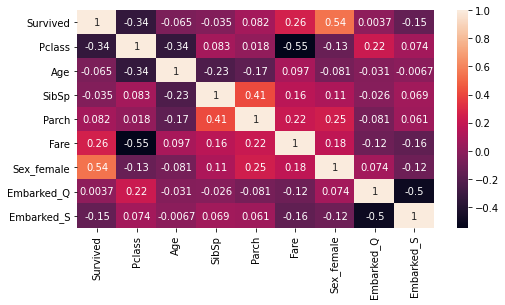

In [ ]:
cormat = titanic.corr()
fig, ax = plt.subplots(figsize = [8,4])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN model

In [ ]:
X = titanic.drop(columns=['Survived'])
Y = titanic['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(846, 8)
y_train_shape(846,)
x_test_shape(45, 8)
y_test_shape(45,)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation="tanh",input_shape=(8, )))
nn.add(layers.Dense(256, activation="sigmoid"))
nn.add(layers.Dense(64, activation="tanh"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="tanh"))
nn.add(layers.Dense(1, activation="sigmoid"))

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 155,009
Trainable params: 155,009
Non-trainable params: 0
__________________________________________________

In [ ]:
nn.compile(optimizer="rmsprop",
           loss='binary_crossentropy',
           metrics = ['accuracy'])

In [ ]:
#hyperpara
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.48837, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.48837 to 0.58140, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.58140

Epoch 00004: val_accuracy improved from 0.58140 to 0.62791, saving model to best_model.h5

Epoch 00005: val_accuracy did not improve from 0.62791

Epoch 00006: val_accuracy did not improve from 0.62791

Epoch 00007: val_accuracy improved from 0.62791 to 0.67442, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.67442

Epoch 00009: val_accuracy did not improve from 0.67442

Epoch 00010: val_accuracy did not improve from 0.67442

Epoch 00011: val_accuracy did not improve from 0.67442

Epoch 00012: val_accuracy did not improve from 0.67442

Epoch 00013: val_accuracy improved from 0.67442 to 0.72093, saving model to best_model.h5

Epoch 00014: val_accuracy improved from 0.72093 to 0.74419, saving model to best_model.h5

Epoch 00

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.756


### Plots

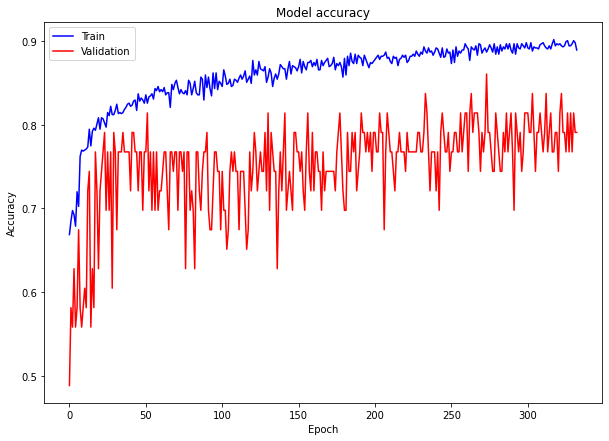

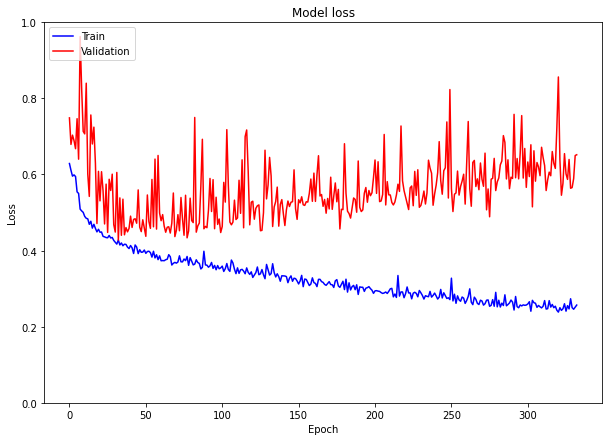

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()